# Data Processing and Visualization
-----
**Assignment Topic: Data Analysis on Car Advertisements**

Group Number: 6

Student1 Name: Liam Barry

SNumber: 5221080

Student2 Name: Ben White

SNumber: 2850345

Student3 Name: Trieu Duong Phan

SNumber: 5377770

# Data Import

In [80]:
path = "" 

In [81]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
car_data = pd.read_csv(path + "car_dataset.csv")
sellers_data = pd.read_csv(path + "seller_dataset.csv")

# 1. Data Formatting

## a. Numerical Conversion

In [83]:
def numerical_conversion(df, columns):

    for column in columns:
        if df[column].astype(str).str.contains("L/100Km", regex=False).any():
            df[column] = df[column].replace("L/100Km", "", regex=True)
            df[column] = df[column].str.extract(r"(\d*\.?\d+)", expand=False)
        else:
            df[column] = df[column].replace(r"[^\d.]", "", regex=True)

        df[column] = df[column].astype(float)

    return df

columns_to_convert = ['mileage', 'num_of_doors', 'seating_capacity', 'fuel_consumption', 'price (AUD)']

car_data = numerical_conversion(car_data, columns_to_convert)

car_data[['num_of_doors', 'seating_capacity']] = car_data[['num_of_doors', 'seating_capacity']].astype(int)

car_data.head()

,ad_id,origin,condition,car_model,mileage,exterior_color,interior_color,num_of_doors,seating_capacity,engine,fuel_system,transmission,drive_type,fuel_consumption,brand,grade,year_of_manufacture,car_name,price (AUD)
0,17042,Domestic assembly,New car,Truck,0.0,White,gray,2,2,Petrol\t1.0 L,NaN,Manual,RFD - Rear-wheel drive,NaN,Suzuki,Super Carry Truck,2022.0,Suzuki Super Carry Truck 1.0 MT 2022,10080.99411
1,53794,Imported,New car,SUV,0.0,Black,Black,5,7,Petrol\t3.4 L,NaN,Automatic,AWD - 4-wheel drive (AWD),10.0,Toyota,Land Cruiser,2022.0,Toyota Land Cruiser 3.5 V6 2022,161943.68050
2,73954,Domestic assembly,New car,Crossover,0.0,Silver,Brown,5,8,Petrol\t2.0 L,NaN,Automatic,RFD - Rear-wheel drive,NaN,Toyota,Innova,2023.0,Toyota Innova G 2.0 AT 2023 car,35830.03930
3,74150,Imported,New car,SUV,0.0,White,Black,5,5,Petrol\t1.8 L,NaN,Automatic,FWD - Front-wheel drive,NaN,Toyota,Corolla Cross,2023.0,Toyota Corolla Cross 1.8G 2023,30526.38376
4,87573,Domestic assembly,New car,Crossover,0.0,Silver,gray,5,8,Petrol\t2.0 L,NaN,Automatic,RFD - Rear-wheel drive,NaN,Toyota,Innova,2022.0,Toyota Innova G 2.0 AT 2022 car,34413.03209


## b. Engine Feature Split

In [84]:
engine_split = car_data['engine'].str.split("\t", expand=True)
car_data['type_of_engine'] = engine_split[0]
car_data['engine_capacity'] = engine_split[1]

car_data.drop('engine', axis=1, inplace=True)

car_data = numerical_conversion(car_data, ['engine_capacity'])

car_data.head()

,ad_id,origin,condition,car_model,mileage,exterior_color,interior_color,num_of_doors,seating_capacity,fuel_system,transmission,drive_type,fuel_consumption,brand,grade,year_of_manufacture,car_name,price (AUD),type_of_engine,engine_capacity
0,17042,Domestic assembly,New car,Truck,0.0,White,gray,2,2,NaN,Manual,RFD - Rear-wheel drive,NaN,Suzuki,Super Carry Truck,2022.0,Suzuki Super Carry Truck 1.0 MT 2022,10080.99411,Petrol,1.0
1,53794,Imported,New car,SUV,0.0,Black,Black,5,7,NaN,Automatic,AWD - 4-wheel drive (AWD),10.0,Toyota,Land Cruiser,2022.0,Toyota Land Cruiser 3.5 V6 2022,161943.68050,Petrol,3.4
2,73954,Domestic assembly,New car,Crossover,0.0,Silver,Brown,5,8,NaN,Automatic,RFD - Rear-wheel drive,NaN,Toyota,Innova,2023.0,Toyota Innova G 2.0 AT 2023 car,35830.03930,Petrol,2.0
3,74150,Imported,New car,SUV,0.0,White,Black,5,5,NaN,Automatic,FWD - Front-wheel drive,NaN,Toyota,Corolla Cross,2023.0,Toyota Corolla Cross 1.8G 2023,30526.38376,Petrol,1.8
4,87573,Domestic assembly,New car,Crossover,0.0,Silver,gray,5,8,NaN,Automatic,RFD - Rear-wheel drive,NaN,Toyota,Innova,2022.0,Toyota Innova G 2.0 AT 2022 car,34413.03209,Petrol,2.0


## c. Standardizing Text Data

In [85]:
def standardize_text_data(df, columns):
    df[columns] = df[columns].apply(lambda x: x.str.lower())
    return df

columns_to_lowercase = ['origin', 'condition', 'car_model', 'exterior_color', 'interior_color', 'type_of_engine',
                        'fuel_system', 'transmission', 'drive_type', 'brand', 'grade']

car_data = standardize_text_data(car_data, columns_to_lowercase)

car_data.head()

,ad_id,origin,condition,car_model,mileage,exterior_color,interior_color,num_of_doors,seating_capacity,fuel_system,transmission,drive_type,fuel_consumption,brand,grade,year_of_manufacture,car_name,price (AUD),type_of_engine,engine_capacity
0,17042,domestic assembly,new car,truck,0.0,white,gray,2,2,NaN,manual,rfd - rear-wheel drive,NaN,suzuki,super carry truck,2022.0,Suzuki Super Carry Truck 1.0 MT 2022,10080.99411,petrol,1.0
1,53794,imported,new car,suv,0.0,black,black,5,7,NaN,automatic,awd - 4-wheel drive (awd),10.0,toyota,land cruiser,2022.0,Toyota Land Cruiser 3.5 V6 2022,161943.68050,petrol,3.4
2,73954,domestic assembly,new car,crossover,0.0,silver,brown,5,8,NaN,automatic,rfd - rear-wheel drive,NaN,toyota,innova,2023.0,Toyota Innova G 2.0 AT 2023 car,35830.03930,petrol,2.0
3,74150,imported,new car,suv,0.0,white,black,5,5,NaN,automatic,fwd - front-wheel drive,NaN,toyota,corolla cross,2023.0,Toyota Corolla Cross 1.8G 2023,30526.38376,petrol,1.8
4,87573,domestic assembly,new car,crossover,0.0,silver,gray,5,8,NaN,automatic,rfd - rear-wheel drive,NaN,toyota,innova,2022.0,Toyota Innova G 2.0 AT 2022 car,34413.03209,petrol,2.0


## d. Numerical Scaling

In [86]:
numerical_columns = ['engine_capacity', 'num_of_doors', 'seating_capacity', 'fuel_consumption', 'price (AUD)']

scaler = MinMaxScaler()
car_data[['normalised_' + column for column in numerical_columns]] = scaler.fit_transform(car_data[numerical_columns])

car_data.head()

,ad_id,origin,condition,car_model,mileage,exterior_color,interior_color,num_of_doors,seating_capacity,fuel_system,...,year_of_manufacture,car_name,price (AUD),type_of_engine,engine_capacity,normalised_engine_capacity,normalised_num_of_doors,normalised_seating_capacity,normalised_fuel_consumption,normalised_price (AUD)
0,17042,domestic assembly,new car,truck,0.0,white,gray,2,2,NaN,...,2022.0,Suzuki Super Carry Truck 1.0 MT 2022,10080.99411,petrol,1.0,0.071429,0.037037,0.042553,NaN,0.004611
1,53794,imported,new car,suv,0.0,black,black,5,7,NaN,...,2022.0,Toyota Land Cruiser 3.5 V6 2022,161943.68050,petrol,3.4,0.261905,0.092593,0.148936,0.00005,0.074074
2,73954,domestic assembly,new car,crossover,0.0,silver,brown,5,8,NaN,...,2023.0,Toyota Innova G 2.0 AT 2023 car,35830.03930,petrol,2.0,0.150794,0.092593,0.170213,NaN,0.016389
3,74150,imported,new car,suv,0.0,white,black,5,5,NaN,...,2023.0,Toyota Corolla Cross 1.8G 2023,30526.38376,petrol,1.8,0.134921,0.092593,0.106383,NaN,0.013963
4,87573,domestic assembly,new car,crossover,0.0,silver,gray,5,8,NaN,...,2022.0,Toyota Innova G 2.0 AT 2022 car,34413.03209,petrol,2.0,0.150794,0.092593,0.170213,NaN,0.015741


In [87]:
# Save processed data to a new CSV file
car_data.to_csv(path + "processed_car_dataset.csv", index=False)

# 2. Data Exploration and Cleaning

In [88]:
processed_car_data = pd.read_csv(path + "processed_car_dataset.csv")

## a. Statistics Computation

In [89]:
columns_to_calculate = ['price (AUD)', 'mileage', 'year_of_manufacture']

def calculate_range(column):
    return column.max() - column.min()

for column in columns_to_calculate:
    mean = processed_car_data[column].mean()
    median = processed_car_data[column].median()
    mode = processed_car_data[column].mode()[0]   # take the first mode if multiple exist
    std = processed_car_data[column].std()
    data_range = calculate_range(processed_car_data[column])

    stats_dict = {
        'Mean': mean,
        'Median': median,
        'Mode': mode,
        'Std Dev': std,
        'Range': data_range
    }

    stats_df = pd.DataFrame(stats_dict, index=[column]).T

    print(f"Calculated statistics for the variable '{column}':")
    display(stats_df)

Calculated statistics for the variable 'price (AUD)':


,price (AUD)
Mean,4.284316e+04
Median,2.493933e+04
Mode,4.048592e+04
Std Dev,7.858559e+04
Range,2.186240e+06


Calculated statistics for the variable 'mileage':


,mileage
Mean,4.123150e+05
Median,2.000000e+04
Mode,0.000000e+00
Std Dev,3.489966e+07
Range,4.294967e+09


Calculated statistics for the variable 'year_of_manufacture':


,year_of_manufacture
Mean,2017.320346
Median,2019.000000
Mode,2023.000000
Std Dev,5.331772
Range,33.000000


## b. Outliers and Missing Values

### i. Checking and addressing outliers

In [90]:
initial_rows = processed_car_data.shape[0]

numerical_columns = processed_car_data.select_dtypes(include='number').columns
numerical_columns = numerical_columns.drop('ad_id').tolist()

Q1 = processed_car_data[numerical_columns].quantile(0.25)
Q3 = processed_car_data[numerical_columns].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((processed_car_data[numerical_columns] < lower_bound) | (processed_car_data[numerical_columns] > upper_bound)).sum()

print("Outliers across all numerical columns:")
outliers

Outliers across all numerical columns:


mileage                        1050
num_of_doors                    769
seating_capacity                225
fuel_consumption                565
year_of_manufacture             887
price (AUD)                    3767
engine_capacity                1076
normalised_engine_capacity     1076
normalised_num_of_doors         769
normalised_seating_capacity     259
normalised_fuel_consumption     576
normalised_price (AUD)         3767
dtype: int64

In [91]:
print("Percentage of outliers in the numerical columns:")
for column in numerical_columns:
    count = outliers[column]
    if count > 0:
        percentage = (count / initial_rows) * 100
        print(f"\t{column}: {percentage:.2f}%")

outlier_matrix = (processed_car_data[numerical_columns] < lower_bound) | (processed_car_data[numerical_columns] > upper_bound)

rows_with_outliers = outlier_matrix.any(axis=1)
percentage_unique_rows = (rows_with_outliers.sum() / processed_car_data.shape[0]) * 100

print(f"\nPercentage of rows with at least one outlier: {percentage_unique_rows:.2f}%")

Percentage of outliers in the numerical columns:
	mileage: 3.43%
	num_of_doors: 2.51%
	seating_capacity: 0.73%
	fuel_consumption: 1.84%
	year_of_manufacture: 2.89%
	price (AUD): 12.29%
	engine_capacity: 3.51%
	normalised_engine_capacity: 3.51%
	normalised_num_of_doors: 2.51%
	normalised_seating_capacity: 0.84%
	normalised_fuel_consumption: 1.88%
	normalised_price (AUD): 12.29%

Percentage of rows with at least one outlier: 21.84%


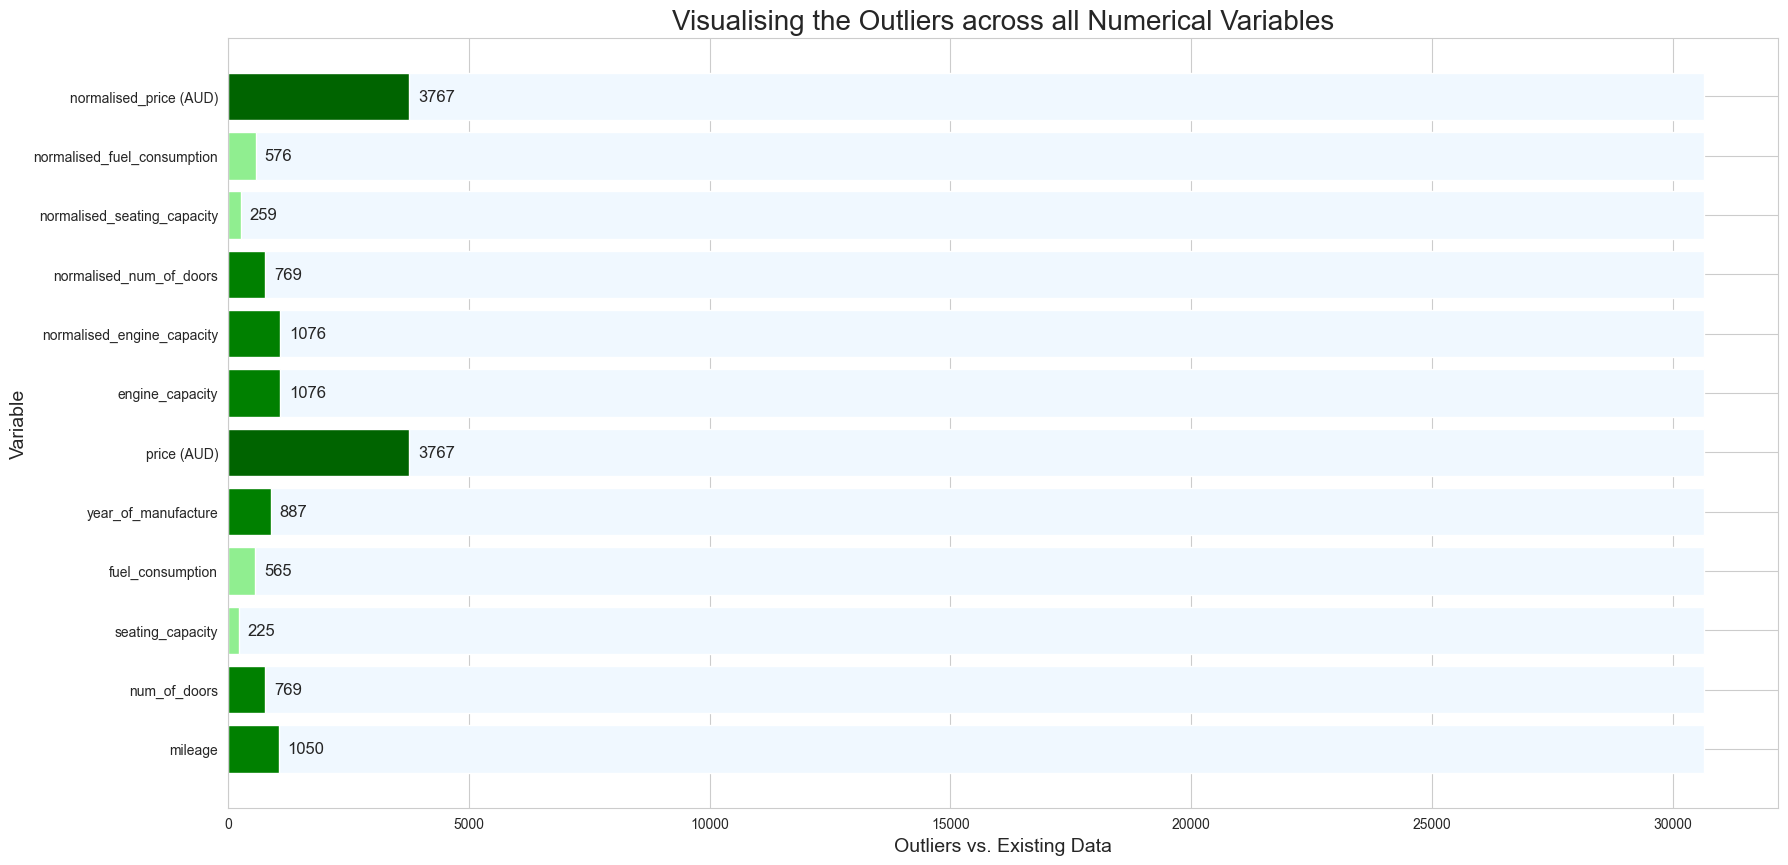

In [92]:
def colourize_outliers(value, maxValue):
    low, high = maxValue * 0.2, maxValue * 0.66
    if value <= low:
        return 'lightgreen'
    elif value >= high:
        return 'darkgreen'
    else:
        return 'green'

cols = [colourize_outliers(n, outliers.max()) for n in outliers]
total_data = [processed_car_data.shape[0]] * len(numerical_columns)

plt.figure(figsize=(20,10))
plt.barh(numerical_columns, total_data, color='aliceblue')
plt.barh(numerical_columns, outliers, color=cols)

plt.title('Visualising the Outliers across all Numerical Variables', size=20)
plt.xlabel('Outliers vs. Existing Data', size=14)
plt.ylabel('Variable', size=14)

for index, value in enumerate(outliers.values):
    plt.text(value + outliers.max() * 0.05, index, str(value), va='center', ha='left', fontsize=12)

plt.show()

In [93]:
cleaned_car_data = processed_car_data[~((processed_car_data[numerical_columns] < lower_bound) | (processed_car_data[numerical_columns] > upper_bound)).any(axis=1)]

final_rows = cleaned_car_data.shape[0]

outliers_removed = initial_rows - final_rows
print(f"Number of outliers removed: {outliers_removed}")

Number of outliers removed: 6693


### ii. Identifying and handling missing values

In [94]:
missing_data = cleaned_car_data.isna().sum()
print("Missing values across the dataset:")
missing_data

Missing values across the dataset:


ad_id                              0
origin                             0
condition                          0
car_model                          0
mileage                            0
exterior_color                     0
interior_color                     0
num_of_doors                       0
seating_capacity                   0
fuel_system                    18697
transmission                       0
drive_type                         0
fuel_consumption               14955
brand                              0
grade                              0
year_of_manufacture               14
car_name                           0
price (AUD)                        0
type_of_engine                     0
engine_capacity                  718
normalised_engine_capacity       718
normalised_num_of_doors            0
normalised_seating_capacity        0
normalised_fuel_consumption    14955
normalised_price (AUD)             0
dtype: int64

In [95]:
print("Percentage of missing data in the dataset:")
totalPercentage = 0
for i in range(len(missing_data)):
    if missing_data.iloc[i] > 0:
        percentage = missing_data.iloc[i] / cleaned_car_data.shape[0]
        totalPercentage += percentage
        print(f"\t{cleaned_car_data.columns[i]}: {percentage:.2f}%")

print(f"\nTotal missing data in the dataset: {totalPercentage:.2f}%")

Percentage of missing data in the dataset:
	fuel_system: 0.78%
	fuel_consumption: 0.62%
	year_of_manufacture: 0.00%
	engine_capacity: 0.03%
	normalised_engine_capacity: 0.03%
	normalised_fuel_consumption: 0.62%

Total missing data in the dataset: 2.09%


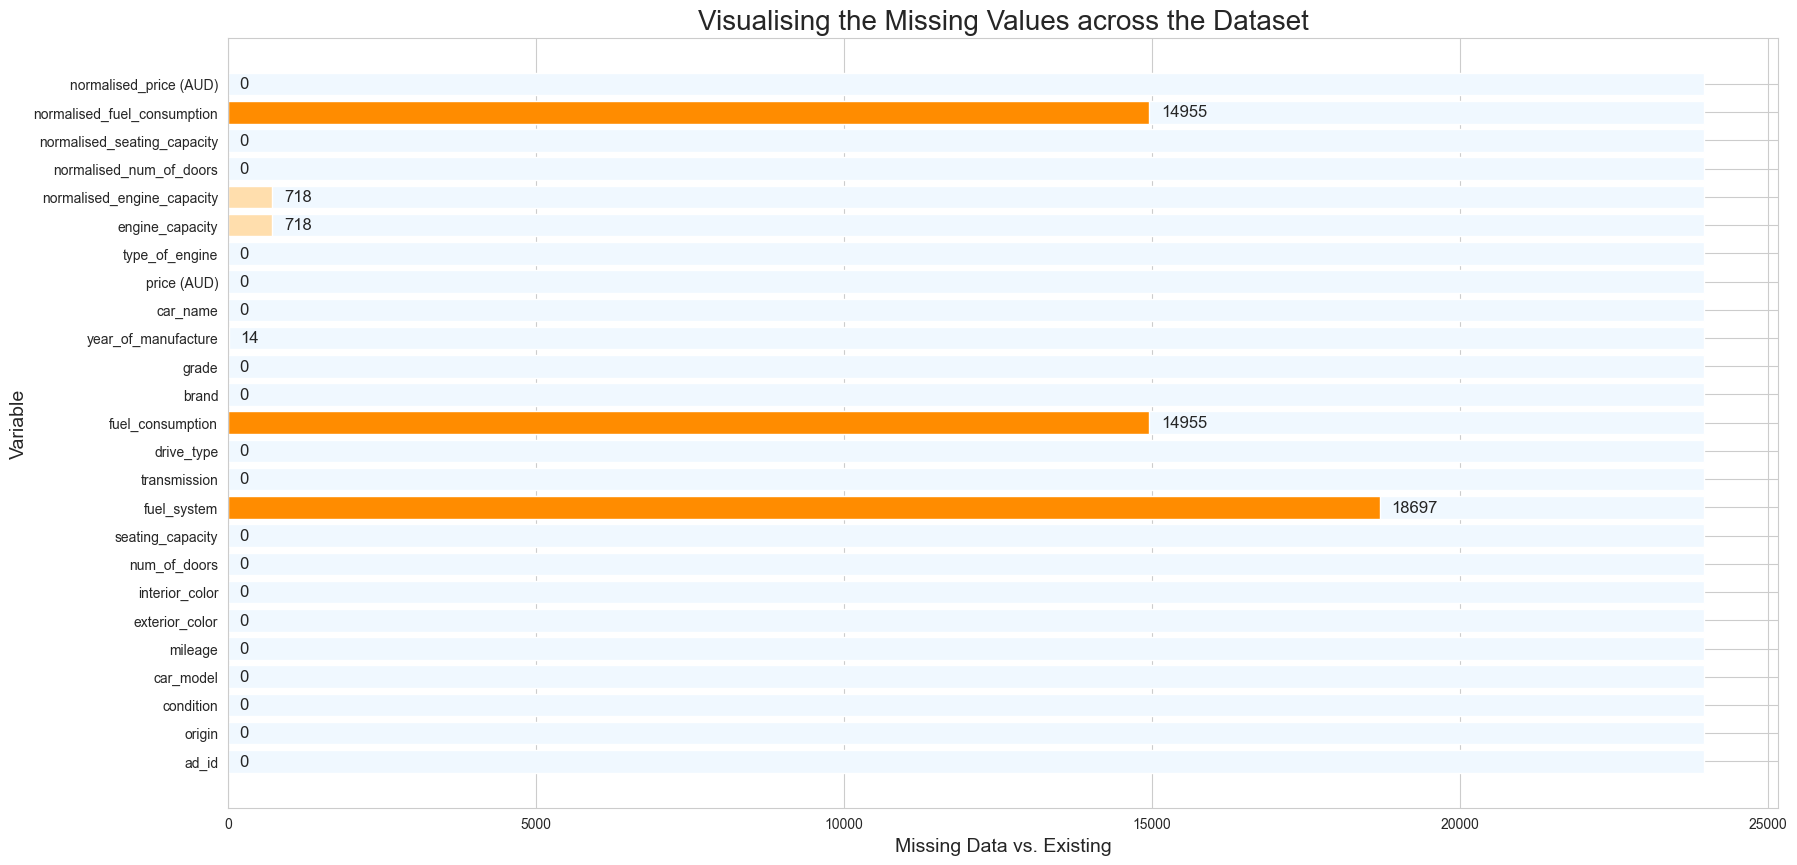

In [96]:
# Visualising the missing data
def colourize_bar(value, maxValue):
    low, high = maxValue * 0.2, maxValue * 0.66
    if(value <= low):
        return 'navajowhite'
    elif(value >= high):
        return 'darkorange'
    else:
        return 'orange'

cols = [colourize_bar(n, missing_data.max()) for n in missing_data]
total_data = [cleaned_car_data.shape[0]] * cleaned_car_data.shape[1]

plt.figure(figsize=(20,10))
plt.barh(cleaned_car_data.columns.values, total_data, color='aliceblue')
plt.barh(cleaned_car_data.columns.values, missing_data, color=cols)

plt.title('Visualising the Missing Values across the Dataset', size=20)
plt.xlabel('Missing Data vs. Existing', size=14)
plt.ylabel('Variable', size=14)

for index, value in enumerate(missing_data.values):
    plt.text(value + missing_data.max() * 0.01, index, str(value), va='center', ha='left', fontsize=12)

plt.show()

In [97]:
# Imputing missing values using RandomForest predictive modeling.
def impute_missing_values(df, target_col, is_categorical, excluded_cols):

    train = df[df[target_col].notna()]
    test = df[df[target_col].isna()]

    if train.empty or test.empty:
        print(f"Skipping '{target_col}' as it has no missing values or all values are missing.")
        return df

    X = train.drop(columns=[target_col] + excluded_cols, errors='ignore')
    y = train[target_col]

    X_test = test.drop(columns=[target_col] + excluded_cols, errors='ignore')

    categorical_features = X.select_dtypes(include=['object']).columns.tolist()
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Defining preprocessing for categorical and numerical data
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features),
            ('num', StandardScaler(), numerical_features)
        ])

    if is_categorical:
        model = RandomForestClassifier(random_state=101, n_jobs=-1)
    else:
        model = RandomForestRegressor(random_state=101, n_jobs=-1)

    # Create a pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipeline.fit(X, y)

    y_pred = pipeline.predict(X_test)

    if is_categorical:
        y_pred = y_pred.astype(df[target_col].dtype)

    # Assign the predicted values
    df.loc[df[target_col].isna(), target_col] = y_pred

    return df

In [98]:
# List of variables with missing values and their types
imputation_order = [
    ('year_of_manufacture', False),
    ('engine_capacity', False),
    ('normalised_engine_capacity', False),
    ('fuel_consumption', False),
    ('normalised_fuel_consumption', False),
    ('fuel_system', True)
]

# Initialize excluded_cols with all missing variables
missing_vars = [var for var, _ in imputation_order]
excluded_cols = missing_vars.copy()

for target, is_cat in imputation_order:
    print(f"Imputing '{target}'...")

    # Exclude all variables with missing values except the current target
    current_excluded = [var for var in excluded_cols if var != target]

    cleaned_car_data = impute_missing_values(cleaned_car_data, target, is_cat, current_excluded)

    # Casting year to be an integer
    if target == 'year_of_manufacture':
        cleaned_car_data.loc[:, target] = cleaned_car_data[target].astype(int)

    print(f"'{target}' imputed.\n")

    # After imputation, remove the target from excluded_cols
    excluded_cols.remove(target)

Imputing 'year_of_manufacture'...
'year_of_manufacture' imputed.

Imputing 'engine_capacity'...
'engine_capacity' imputed.

Imputing 'normalised_engine_capacity'...
'normalised_engine_capacity' imputed.

Imputing 'fuel_consumption'...
'fuel_consumption' imputed.

Imputing 'normalised_fuel_consumption'...
'normalised_fuel_consumption' imputed.

Imputing 'fuel_system'...
'fuel_system' imputed.



In [99]:
print("Missing values after predictive modeling:")
print(cleaned_car_data.isna().sum())

Missing values after predictive modeling:
ad_id                          0
origin                         0
condition                      0
car_model                      0
mileage                        0
exterior_color                 0
interior_color                 0
num_of_doors                   0
seating_capacity               0
fuel_system                    0
transmission                   0
drive_type                     0
fuel_consumption               0
brand                          0
grade                          0
year_of_manufacture            0
car_name                       0
price (AUD)                    0
type_of_engine                 0
engine_capacity                0
normalised_engine_capacity     0
normalised_num_of_doors        0
normalised_seating_capacity    0
normalised_fuel_consumption    0
normalised_price (AUD)         0
dtype: int64


In [100]:
print(f"Before cleaning data: {processed_car_data.shape[0]} rows.")
print(f"After cleaning data: {cleaned_car_data.shape[0]} rows.")

Before cleaning data: 30652 rows.
After cleaning data: 23959 rows.


In [101]:
# Save cleaned data to a new CSV file
cleaned_car_data.to_csv(path + "cleaned_car_dataset.csv", index=False)

# 3. Data Storage

In [102]:
con = sqlite3.connect("carAdverts.db")
cur = con.cursor()

## a. Creating Cars Table & b. Creating Sellers Table

In [103]:
fileNames = ["cleaned_car", "seller"]
fileStructures = {
    "Cars": {
        "ad_id": "ad_id INTEGER PRIMARY KEY",
        "car_name": "car_name VARCHAR(255)",
        "origin": "origin VARCHAR(255)",
        "condition": "condition VARCHAR(255)",
        "exterior_color": "exterior_color VARCHAR(255)",
        "car_model": "car_model VARCHAR(255)",
        "year_of_manufacture": "year_of_manufacture VARCHAR(255)",
        "transmission": "transmission VARCHAR(255)",
        "price": "price INTEGER",
        "drive_type": "drive_type VARCHAR(255)"
    },
    "Sellers": {
        "ad_id": "ad_id INTEGER PRIMARY KEY",
        "seller_name": "seller_name TEXT"
    }
}

tableNames = {
    "cleaned_car": "Cars",
    "seller": "Sellers"
}

In [104]:
def readCSV(csvName, fileStructure, tableName):
    ## READ CSV + HEADERS #
    with open(path + f"{csvName}_dataset.csv", "r") as csvFile:
        dictReader = csv.DictReader(csvFile)
        dictHeaders = dictReader.fieldnames # column names

        columnMapping = {
            "price (AUD)": "price",
            "name": "seller_name"
        }

        adjustedHeaders = [
            columnMapping.get(colName, colName) for colName in dictHeaders
        ]

        toInsert = [
            [dictRow.get(dictKey) for dictKey in dictHeaders if columnMapping.get(dictKey, dictKey) in fileStructure]
            for dictRow in dictReader
        ]
    ## READ CSV + HEADERS #

    ## CREATE TABLE ##
    cur.execute(f"DROP TABLE IF EXISTS {tableName};")

    insertColumns = []
    for colName in adjustedHeaders:
        if colName in fileStructure:
            insertColumns.append(fileStructure[colName])
    createString = ', '.join(insertColumns)

    sqlQuery = f"CREATE TABLE IF NOT EXISTS {tableName} ({createString});"
    cur.execute(sqlQuery)
    ## CREATE TABLE ##

    ## INSERT DATA ##
    insertHeaders = ", ".join([col for col in adjustedHeaders if col in fileStructure])
    insertValues = ", ".join("?" for _ in insertHeaders.split(", "))
    sqlQuery = f"INSERT INTO {tableName} ({insertHeaders}) VALUES ({insertValues});"
    cur.executemany(sqlQuery, toInsert)
    ## INSERT DATA ##

    print(f"Completed import for {tableName} with {len(cur.execute(f'SELECT * FROM {tableName}').fetchall())} rows...")


for fileName in fileNames:
    tableName = tableNames[fileName]
    fileStructure = fileStructures[tableName]
    readCSV(fileName, fileStructure, tableName)

Completed import for Cars with 23959 rows...
Completed import for Sellers with 30652 rows...


## c. Making the Query

In [105]:
sqlQuery = """
    SELECT
        Cars.ad_id,
        Cars.car_name,
        Cars.price,
        Sellers.seller_name
    FROM Cars
    LEFT OUTER JOIN Sellers ON Cars.ad_id = Sellers.ad_id;
"""

cur.execute(sqlQuery)
results = cur.fetchall()
for row in results:
    print(row)

(73954, 'Toyota Innova G 2.0 AT 2023 car', 35830.0393, 'Toyota - Brisbane')
(74150, 'Toyota Corolla Cross 1.8G 2023', 30526.38376, 'Toyota - Perth')
(87573, 'Toyota Innova G 2.0 AT 2022 car', 34413.03209, 'Toyota - Adelaide')
(97011, 'Suzuki Super Carry Van Blind Van 2023', 12105.29011, 'Suzuki - Canberra')
(101726, 'Honda CRV L 2023 car', 39838.14539, 'Honda - Darwin')
(135739, 'Toyota Fortuner 2.7L 4x2 AT 2023', 40485.92011, 'Toyota - Hobart')
(142495, 'Ford Ranger XLS 2.0L 4x2 AT 2023', 27854.31303, 'Ford - Gold Coast')
(143308, 'Ford Ranger XLT 2.0L 4x4 AT 2023', 33603.31369, 'Ford - Newcastle')
(174951, 'Ford Transit Ambulance 2023', 38056.76491, 'Ford - Wollongong')
(182003, 'Toyota Innova E 2.0 MT 2022', 30364.44008, 'Toyota - Geelong')
(183963, 'Toyota Vios E CVT 2022', 21943.3687, 'Toyota - Cairns')
(203337, 'Ford Everest Ambiente 2.0L 4x2 AT 2023', 40485.92011, 'Ford - Toowoomba')
(211394, 'Toyota Yaris G 1.5 AT 2022', 26315.84807, 'Toyota - Ballarat')
(304604, 'Toyota Vios G

# Data Visualization

## a. Static Data Visualisation

In [106]:
# Load the cleaned dataset
car_data = pd.read_csv(path + "cleaned_car_dataset.csv")

### i. Relationship between 'mileage' and 'price'

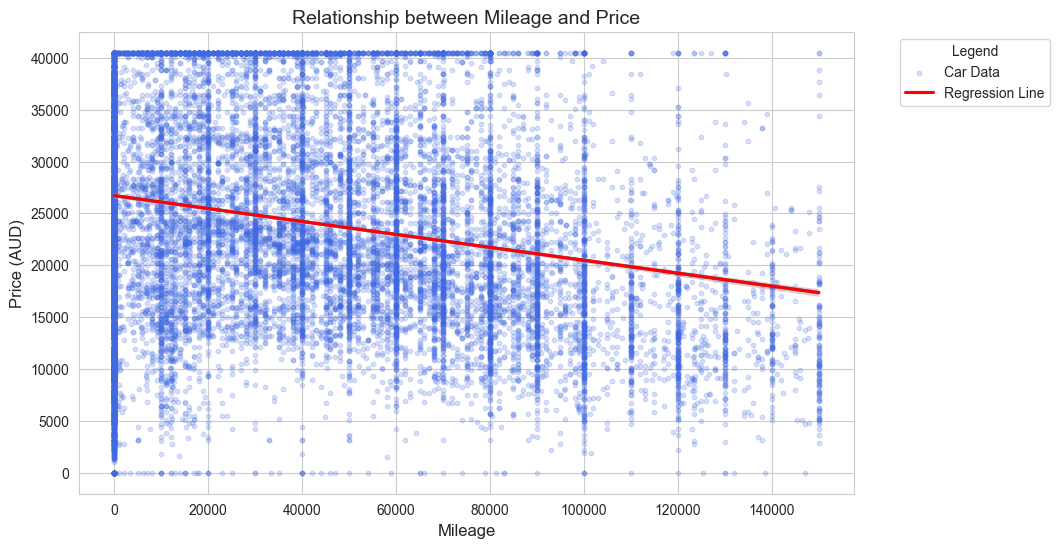

In [107]:
plt.figure(figsize=(10, 6))

sns.regplot(x='mileage', y='price (AUD)', data=car_data, label='Car Data',
            scatter_kws={'color': 'royalblue', 'alpha': 0.2, 's': 10})
sns.regplot(x='mileage', y='price (AUD)', data=car_data, scatter=False, label='Regression Line',
            line_kws={'color': 'red'})

plt.title('Relationship between Mileage and Price', fontsize=14)
plt.xlabel('Mileage', fontsize=12)
plt.ylabel('Price (AUD)', fontsize=12)

plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The scatter plot above shows a negative trend between mileage and price, with higher mileage generally correlating to lower prices, as indicated by the downward-sloping trendline. However, there is significant variability, particularly at lower mileages, where prices still range widely. This suggests that while mileage affects pricing, other factors also play a role.

### ii. Trend of car prices over the 'year_of_m'

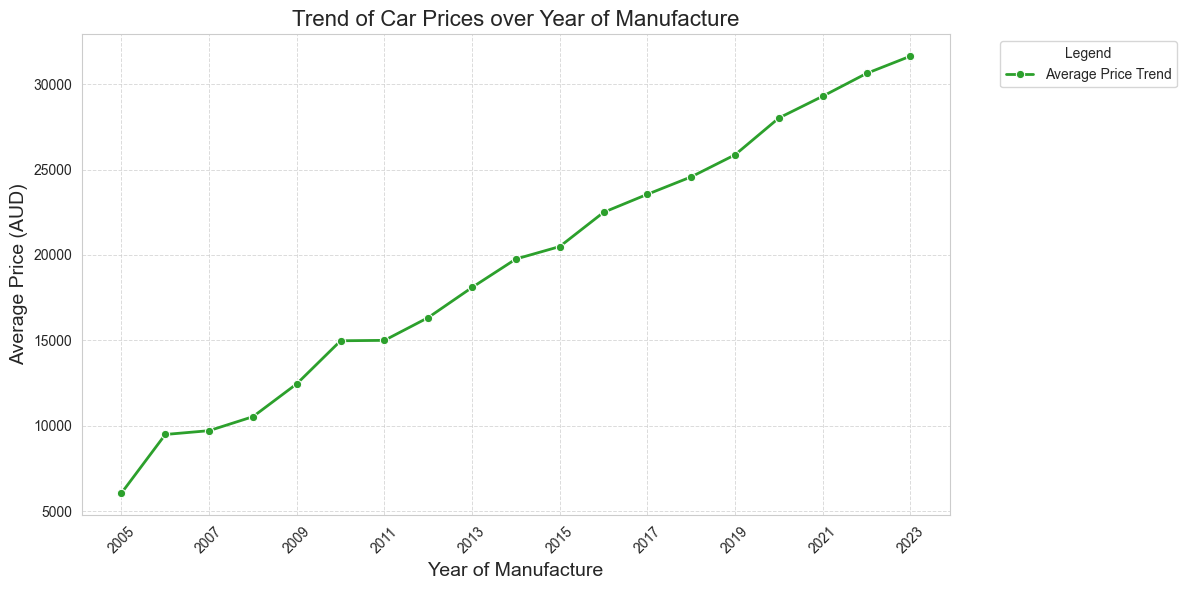

In [108]:
year_price_mean = car_data.groupby('year_of_manufacture')['price (AUD)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=year_price_mean, x='year_of_manufacture', y='price (AUD)', marker='o', color='#2ca02c', linewidth=2, label='Average Price Trend')

plt.title('Trend of Car Prices over Year of Manufacture', fontsize=16)
plt.xlabel('Year of Manufacture', fontsize=14)
plt.ylabel('Average Price (AUD)', fontsize=14)

years = year_price_mean['year_of_manufacture']
plt.xticks(rotation=45, ticks=years[::2])

plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

The line graph above shows a clear upward trend in car prices over the years of manufacture, indicating that newer cars generally have higher average prices. From 2005 to 2023, there is a steady increase, with significant price growth after 2010. The consistent rise suggests that factors such as newer technology, improved features, and perhaps inflation may contribute to this trend. This implies that the year of manufacture is an important factor in determining the price, with more recent cars typically being priced higher.

### iii. Average prices among different 'car_models'

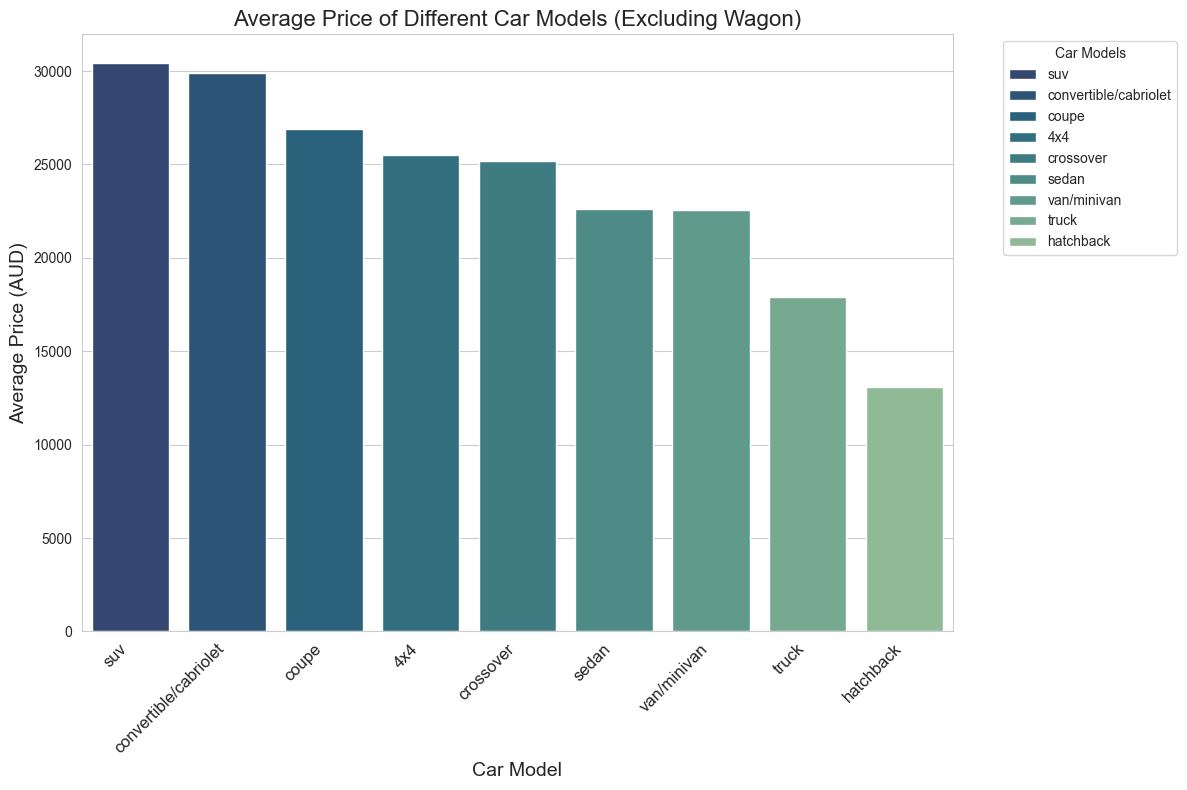

In [109]:
car_data_filtered = car_data[car_data['car_model'] != 'wagon']

model_price_mean = car_data_filtered.groupby('car_model')['price (AUD)'].mean().reset_index()
model_price_mean = model_price_mean.sort_values(by='price (AUD)', ascending=False)

plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

bar_plot = sns.barplot(data=model_price_mean, x='car_model', y='price (AUD)', hue='car_model', palette='crest_r')

plt.title('Average Price of Different Car Models (Excluding Wagon)', fontsize=16)
plt.xlabel('Car Model', fontsize=14)
plt.ylabel('Average Price (AUD)', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)

for bar, label in zip(bar_plot.patches, model_price_mean['car_model']):
    bar.set_label(label)

plt.legend(title='Car Models', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

The bar chart above compares the average prices of different car models. SUVs and convertibles/cabriolets have the highest average prices, both around 30,000 AUD, followed by coupes and 4x4s, which also show relatively high prices. Crossovers, sedans, and vans/minivans are in the middle range, while trucks are priced lower on average. Hatchbacks have the lowest average price, falling well below 20,000 AUD. This suggests that larger vehicles, such as SUVs and convertibles, tend to be more expensive, while smaller models like hatchbacks are generally more affordable.

### iv. Distribution of ‘engine_capacity’

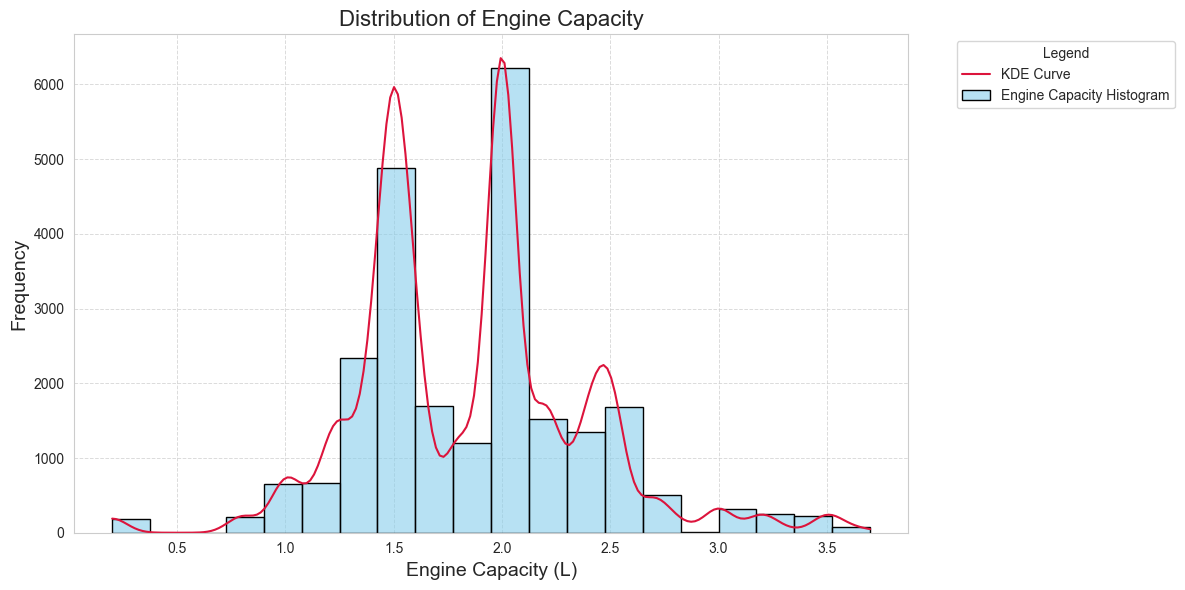

In [110]:
plt.figure(figsize=(12, 6))

ax = sns.histplot(data=car_data, x='engine_capacity', bins=20, kde=True, color='skyblue', edgecolor='black', alpha=0.6)
ax.lines[0].set_color('crimson')

plt.title('Distribution of Engine Capacity', fontsize=16)
plt.xlabel('Engine Capacity (L)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend(labels=['KDE Curve', 'Engine Capacity Histogram'], title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

The histogram and KDE curve above show the distribution of engine capacity. The data is bimodal, with two prominent peaks around 1.5L and 2.0L, indicating that most cars in the dataset have engines around these sizes. There are smaller groups of cars with engine capacities below 1.0L and a few with larger engines, up to around 3.5L. The distribution tails off as engine capacity increases, suggesting that higher-capacity engines are less common in the dataset. Overall, the most frequent engine sizes are between 1.0L and 2.0L.

### v. Distribution of the cars’ exterior colors as the percentage of a whole

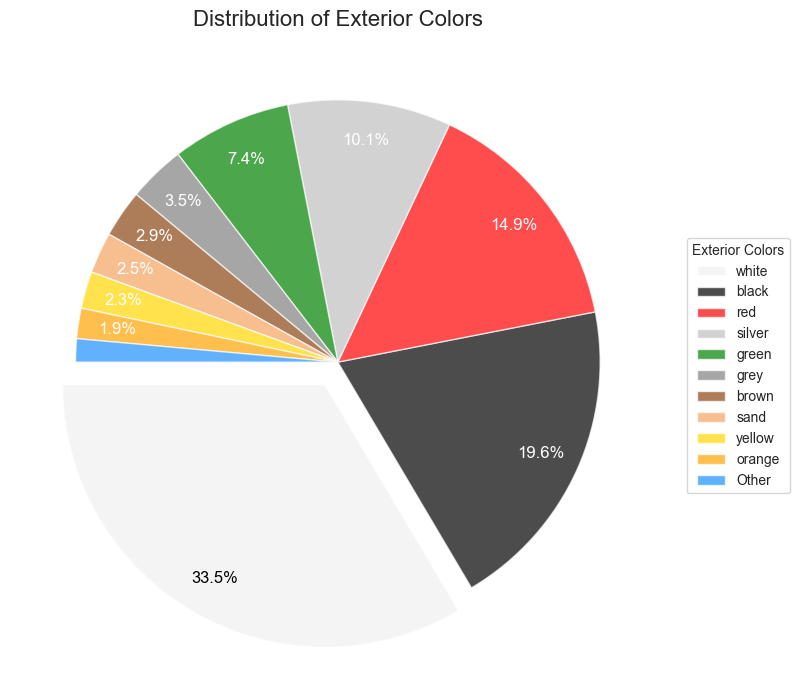

In [111]:
car_data = car_data[car_data['exterior_color'] != 'take note']

color_counts = car_data['exterior_color'].value_counts()

total_count = color_counts.sum()
threshold = 0.01 * total_count

top_colors = color_counts[color_counts >= threshold]
other_total = color_counts[color_counts < threshold].sum()

if other_total > 0:
    top_colors = pd.concat([top_colors, pd.Series({'Other': other_total})])

color_percentages = top_colors / total_count * 100

# Map each exterior color to its corresponding actual color
color_mapping = {
    'white': '#f0f0f0',
    'black': 'black',
    'red': 'red',
    'silver': 'silver',
    'green': 'green',
    'grey': 'grey',
    'brown': 'saddlebrown',
    'sand': 'sandybrown',
    'yellow': 'gold',
    'orange': 'orange',
    'Other': 'dodgerblue'
}

colors_to_use = [color_mapping.get(color, 'dodgerblue') for color in color_percentages.index]
explode_values = [0.1 if color == 'white' else 0 for color in color_percentages.index]

plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(
    color_percentages,
    explode=explode_values,
    labels=None,
    colors=colors_to_use,
    autopct=lambda pct: '{:.1f}%'.format(pct) if pct >= 1.5 else '',
    pctdistance=0.85,
    startangle=180,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white', 'alpha': 0.7}
)

for i, autotext in enumerate(autotexts):
    autotext.set_fontsize(12)
    if color_percentages.index[i] == 'white':
        autotext.set_color('black')
    else:
        autotext.set_color('white')

plt.legend(title='Exterior Colors', labels=top_colors.index, loc="upper right", bbox_to_anchor=(1.2, 0.7))
plt.title('Distribution of Exterior Colors', fontsize=16)

plt.tight_layout()
plt.show()

The pie chart above displays the distribution of cars' exterior colours. White is the most common colour, accounting for 33.5% of the total, followed by black at 19.6% and red at 14.9%. Silver is also prevalent, making up 10.1%. Other colours, such as green, grey, brown, sand, yellow, orange, and others, represent smaller portions, with green being the most common among them at 7.4%. Overall, neutral car colours like white, black, and silver dominate, while more vibrant colours are less common.

### vi. Correlations between specified features

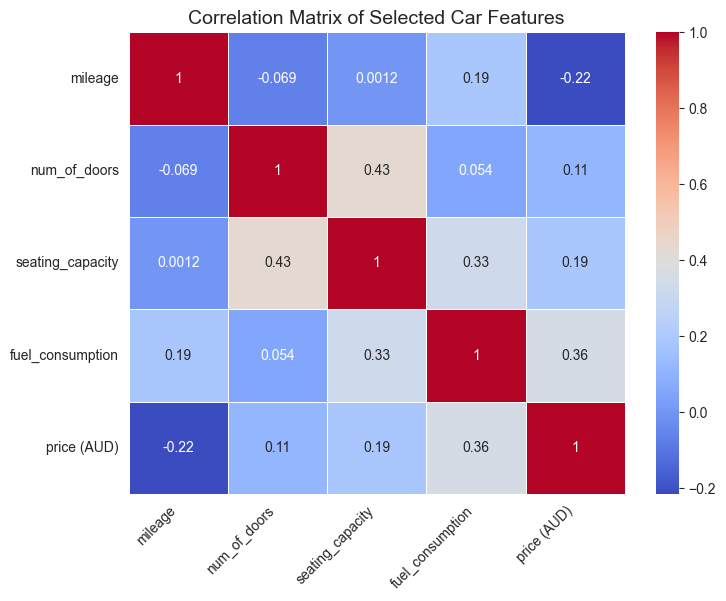

In [112]:
plt.figure(figsize=(8, 6))

corr_matrix = car_data[['mileage', 'num_of_doors', 'seating_capacity', 'fuel_consumption', 'price (AUD)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix of Selected Car Features', fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.show()

The correlation matrix above reveals several key relationships between the selected car features. Mileage has a moderate negative correlation with price (-0.22), indicating that higher mileage generally leads to lower prices. Fuel consumption has a moderate positive correlation with price (0.36), suggesting that cars with higher fuel consumption tend to have higher prices. Seating capacity also shows a moderate correlation with both the number of doors (0.43) and fuel consumption (0.33). Other correlations are relatively weak, such as mileage with fuel consumption (0.19) and price with seating capacity (0.19), indicating that these features don't have a strong connection. Additionally, some features show very low correlations. For example, mileage and seating capacity (0.0012), as well as the number of doors and fuel consumption (0.054), show almost no relationship, suggesting these features are largely independent of each other and don't influence one another in a meaningful way.

## b. Interactive Visualization Enhancement

### Link to completed ObservableHQ notebook:
### https://observablehq.com/d/f60da854f4fc5dff

# Predictive Modeling


## Price Point Categorization using Machine Learning

This section implements Machine Learning algorithms including Logistic Regression and Decision Trees to categorize vehicle price points into Low, Medium, and High categories.


In [113]:
# Import additional libraries for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')


### a. Creating Price Categories


In [114]:
# Load the cleaned dataset
modeling_data = pd.read_csv(path + "cleaned_car_dataset.csv")

# Create price categories based on percentiles
price_33 = modeling_data['price (AUD)'].quantile(0.33)
price_67 = modeling_data['price (AUD)'].quantile(0.67)

print(f"Price thresholds:")
print(f"  Low: < ${price_33:,.2f}")
print(f"  Medium: ${price_33:,.2f} - ${price_67:,.2f}")
print(f"  High: > ${price_67:,.2f}")

# Create price category labels
def categorize_price(price):
    if price < price_33:
        return 'Low'
    elif price < price_67:
        return 'Medium'
    else:
        return 'High'

modeling_data['price_category'] = modeling_data['price (AUD)'].apply(categorize_price)

# Display distribution of price categories
print(f"\nPrice category distribution:")
print(modeling_data['price_category'].value_counts())
print(f"\nPercentage distribution:")
print(modeling_data['price_category'].value_counts(normalize=True) * 100)


Price thresholds:
  Low: < $18,866.44
  Medium: $18,866.44 - $29,554.72
  High: > $29,554.72

Price category distribution:
price_category
Medium    8148
High      7912
Low       7899
Name: count, dtype: int64

Percentage distribution:
price_category
Medium    34.008097
High      33.023081
Low       32.968822
Name: proportion, dtype: float64


### b. Feature Preparation


In [115]:
# Select features for modeling
# Exclude price-related columns and IDs
feature_columns = [
    'origin', 'condition', 'car_model', 'mileage', 'exterior_color', 
    'interior_color', 'num_of_doors', 'seating_capacity', 'fuel_system',
    'transmission', 'drive_type', 'fuel_consumption', 'brand', 'grade',
    'year_of_manufacture', 'type_of_engine', 'engine_capacity'
]

# Create a copy for feature engineering
X = modeling_data[feature_columns].copy()
y = modeling_data['price_category'].copy()

# Encode categorical variables
label_encoders = {}
categorical_columns = X.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Encode target variable
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

print(f"Features shape: {X.shape}")
print(f"Target shape: {y_encoded.shape}")
print(f"\nFeature columns: {list(X.columns)}")
print(f"\nTarget categories: {target_encoder.classes_}")


Features shape: (23959, 17)
Target shape: (23959,)

Feature columns: ['origin', 'condition', 'car_model', 'mileage', 'exterior_color', 'interior_color', 'num_of_doors', 'seating_capacity', 'fuel_system', 'transmission', 'drive_type', 'fuel_consumption', 'brand', 'grade', 'year_of_manufacture', 'type_of_engine', 'engine_capacity']

Target categories: ['High' 'Low' 'Medium']


### c. Train-Test Split


In [116]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Scale features for Logistic Regression (important for convergence and performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:")
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  {target_encoder.classes_[u]}: {c} ({c/len(y_train)*100:.2f}%)")
print(f"\nFeatures have been scaled using StandardScaler for Logistic Regression.")


Training set size: 19167 samples
Test set size: 4792 samples

Training set class distribution:
  High: 6330 (33.03%)
  Low: 6319 (32.97%)
  Medium: 6518 (34.01%)

Features have been scaled using StandardScaler for Logistic Regression.


### d. Logistic Regression Model


In [117]:
# Initialize and train Logistic Regression model with scaled data
# Using scaled features and increased max_iter to avoid convergence warnings
# Using 'lbfgs' solver which works well with scaled data
logistic_model = LogisticRegression(
    max_iter=5000, 
    random_state=42, 
    solver='lbfgs',
    C=1.0,  # Regularization parameter
    multi_class='multinomial'
)

print("Training Logistic Regression model with scaled features...")
logistic_model.fit(X_train_scaled, y_train)

# Make predictions using scaled data
y_train_pred_lr = logistic_model.predict(X_train_scaled)
y_test_pred_lr = logistic_model.predict(X_test_scaled)

# Calculate accuracy
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)

print("\nLogistic Regression Results (with feature scaling):")
print(f"  Training Accuracy: {train_accuracy_lr:.4f} ({train_accuracy_lr*100:.2f}%)")
print(f"  Test Accuracy: {test_accuracy_lr:.4f} ({test_accuracy_lr*100:.2f}%)")
print(f"  Number of iterations: {logistic_model.n_iter_[0]}")


Training Logistic Regression model with scaled features...

Logistic Regression Results (with feature scaling):
  Training Accuracy: 0.7520 (75.20%)
  Test Accuracy: 0.7529 (75.29%)
  Number of iterations: 19


In [118]:
# Detailed classification report for Logistic Regression
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_test_pred_lr, target_names=target_encoder.classes_))


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

        High       0.78      0.76      0.77      1582
         Low       0.85      0.80      0.82      1580
      Medium       0.65      0.70      0.67      1630

    accuracy                           0.75      4792
   macro avg       0.76      0.75      0.76      4792
weighted avg       0.76      0.75      0.75      4792



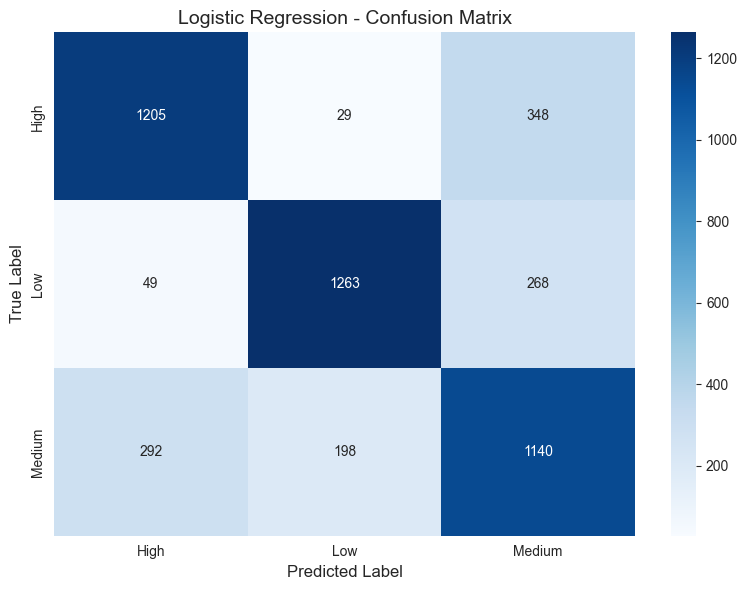

In [119]:
# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_test_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_encoder.classes_, 
            yticklabels=target_encoder.classes_)
plt.title('Logistic Regression - Confusion Matrix', fontsize=14)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()


### e. Decision Tree Model


In [120]:
decision_tree_model = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=50)
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_train_pred_dt = decision_tree_model.predict(X_train)
y_test_pred_dt = decision_tree_model.predict(X_test)

# Calculate accuracy
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

print("Decision Tree Results:")
print(f"  Training Accuracy: {train_accuracy_dt:.4f} ({train_accuracy_dt*100:.2f}%)")
print(f"  Test Accuracy: {test_accuracy_dt:.4f} ({test_accuracy_dt*100:.2f}%)")


Decision Tree Results:
  Training Accuracy: 0.9055 (90.55%)
  Test Accuracy: 0.8934 (89.34%)


In [121]:
print("Decision Tree - Classification Report:")
print(classification_report(y_test, y_test_pred_dt, target_names=target_encoder.classes_))


Decision Tree - Classification Report:
              precision    recall  f1-score   support

        High       0.90      0.93      0.91      1582
         Low       0.93      0.89      0.91      1580
      Medium       0.85      0.86      0.86      1630

    accuracy                           0.89      4792
   macro avg       0.89      0.89      0.89      4792
weighted avg       0.89      0.89      0.89      4792



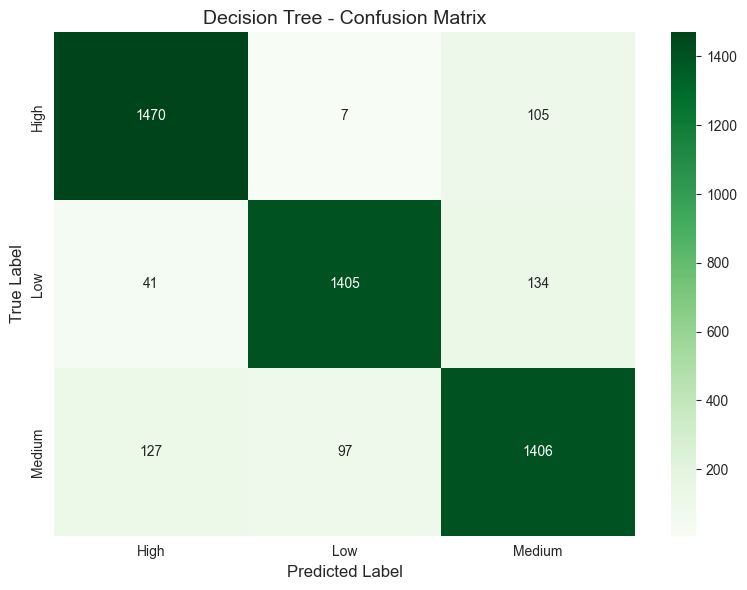

In [122]:
# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_test_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', 
            xticklabels=target_encoder.classes_, 
            yticklabels=target_encoder.classes_)
plt.title('Decision Tree - Confusion Matrix', fontsize=14)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()


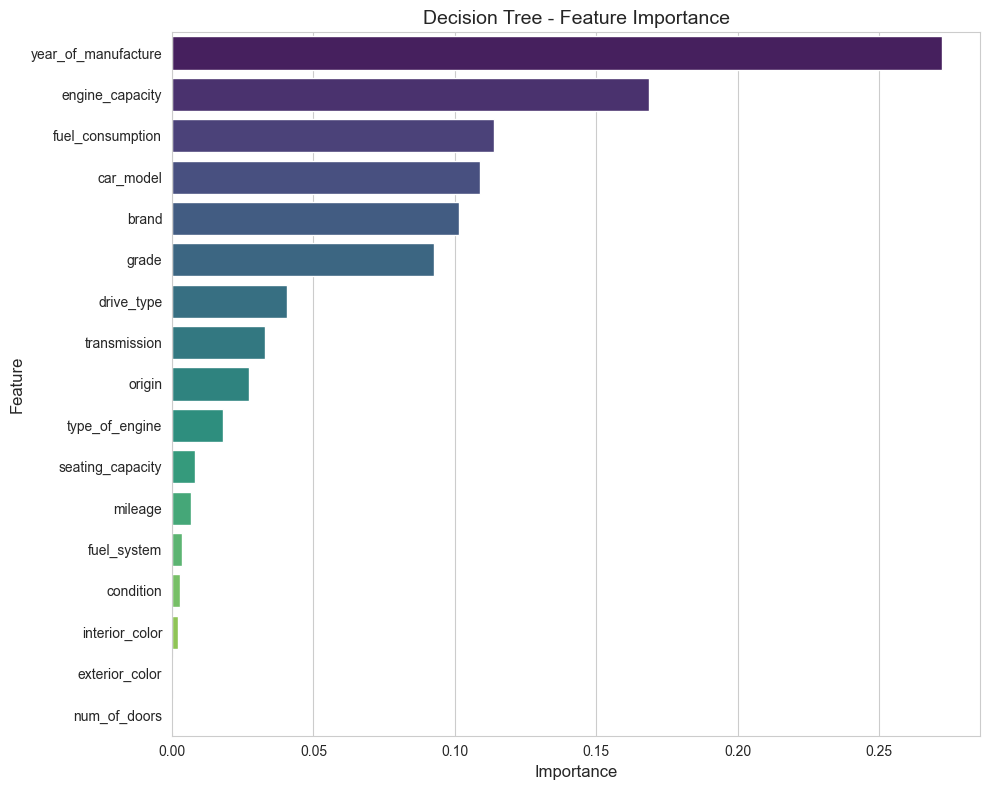

Top 10 Most Important Features:
                feature  importance
14  year_of_manufacture    0.272059
16      engine_capacity    0.168613
11     fuel_consumption    0.113802
2             car_model    0.108740
12                brand    0.101494
13                grade    0.092683
10           drive_type    0.040558
9          transmission    0.032730
0                origin    0.027317
15       type_of_engine    0.017953


In [123]:
# Feature importance from Decision Tree
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': decision_tree_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Decision Tree - Feature Importance', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

print("Top 10 Most Important Features:")
print(feature_importance.head(10))


### f. Model Comparison


In [124]:
# Compare model performances
comparison_data = {
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Training Accuracy': [train_accuracy_lr, train_accuracy_dt],
    'Test Accuracy': [test_accuracy_lr, test_accuracy_dt]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df['Training Accuracy'] = comparison_df['Training Accuracy'].apply(lambda x: f"{x:.4f} ({x*100:.2f}%)")
comparison_df['Test Accuracy'] = comparison_df['Test Accuracy'].apply(lambda x: f"{x:.4f} ({x*100:.2f}%)")

print("Model Performance Comparison:")
print(comparison_df.to_string(index=False))


Model Performance Comparison:
              Model Training Accuracy   Test Accuracy
Logistic Regression   0.7520 (75.20%) 0.7529 (75.29%)
      Decision Tree   0.9055 (90.55%) 0.8934 (89.34%)


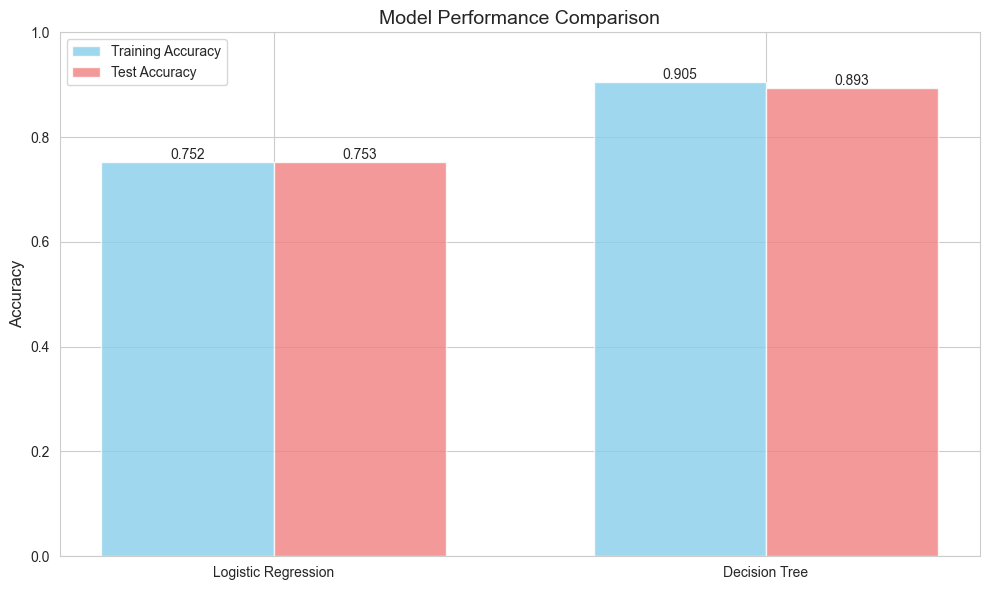

In [125]:
# Visual comparison of model accuracies
fig, ax = plt.subplots(figsize=(10, 6))

models = ['Logistic Regression', 'Decision Tree']
train_acc = [train_accuracy_lr, train_accuracy_dt]
test_acc = [test_accuracy_lr, test_accuracy_dt]

x = np.arange(len(models))
width = 0.35

bars1 = ax.bar(x - width/2, train_acc, width, label='Training Accuracy', color='skyblue', alpha=0.8)
bars2 = ax.bar(x + width/2, test_acc, width, label='Test Accuracy', color='lightcoral', alpha=0.8)

ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Model Performance Comparison', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set_ylim([0, 1])

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### Summary

Both Logistic Regression and Decision Tree models were successfully implemented to categorize vehicle price points into Low, Medium, and High categories. The models were trained on various features including vehicle specifications, brand, model, and other characteristics. The performance of both models was evaluated using accuracy metrics, classification reports, and confusion matrices. Feature importance analysis from the Decision Tree model provides insights into which features are most influential in determining price categories.
